In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


# Classification with an Academic Success Dataset

Öğrencilerin çeşitli özellikleri kullanılarak okulu bırakıp bırakmayacaklarını tahmin eden model geliştirilmektedir.

Projede kullanılan verilere [buradan](https://www.kaggle.com/competitions/playground-series-s4e6/data) ulaşılabilir.

<img src="https://www.kaggle.com/competitions/73290/images/header">

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")

df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

<Axes: xlabel='Target', ylabel='count'>

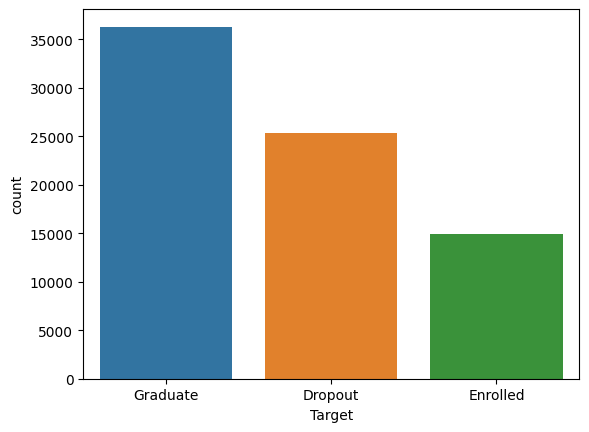

In [4]:
sns.countplot(x=df["Target"])

In [84]:
labels=["Dropout", "Enrolled", "Graduate"]
d={"Dropout":0, "Enrolled":1, "Graduate":2}
df["class"]=df["Target"].map(d)
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,class
0,0,1,1,1,9238,1,1,126.0,1,1,...,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate,2


<Axes: >

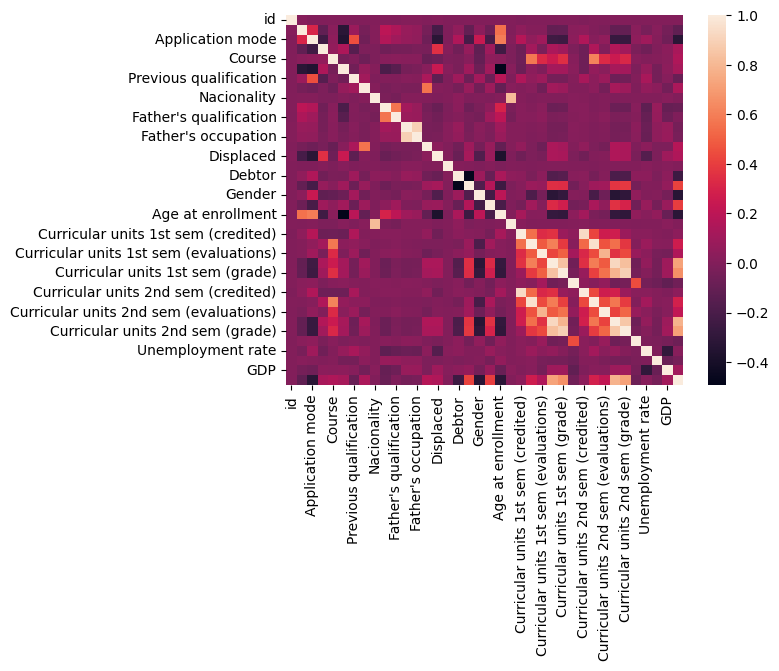

In [7]:
sns.heatmap(df.corr(numeric_only=True))

In [9]:
df.corr(numeric_only=True)['class'].sort_values(ascending=False)

class                                             1.000000
Curricular units 2nd sem (approved)               0.781452
Curricular units 1st sem (approved)               0.725490
Curricular units 2nd sem (grade)                  0.719036
Curricular units 1st sem (grade)                  0.661355
Tuition fees up to date                           0.415691
Scholarship holder                                0.394124
Curricular units 2nd sem (enrolled)               0.289165
Curricular units 1st sem (enrolled)               0.263657
Curricular units 2nd sem (evaluations)            0.214951
Admission grade                                   0.172880
Course                                            0.154208
Curricular units 1st sem (evaluations)            0.152398
Displaced                                         0.150066
Previous qualification (grade)                    0.138119
Application order                                 0.128394
Daytime/evening attendance                        0.1244

## Modelleme

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [30]:
x=df.drop(["id", "Target", "class"], axis=1)
y=df[["class"]]
x.shape, y.shape

((76518, 36), (76518, 1))

In [12]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[6038  930  611]
 [ 522 1959 1944]
 [ 397  913 9642]]
BernoulliNB()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5408  967 1204]
 [ 255 1108 3062]
 [ 174  966 9812]]
LogisticRegression()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 5895   396  1288]
 [  728   503  3194]
 [  399    69 10484]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[5963 1046  570]
 [ 976 2144 1305]
 [ 656 1402 8894]]
RandomForestClassifier()  modeli eğitiliyor!..


/tmp/ipykernel_34/3015561559.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(x_train,y_train)


[[ 6289   796   494]
 [  530  2620  1275]
 [  164   650 10138]]
GradientBoostingClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 6304   790   485]
 [  499  2696  1230]
 [  162   693 10097]]
KNeighborsClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[5780  903  896]
 [ 809 1940 1676]
 [ 628 1137 9187]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[ 6304   790   485]
 [  499  2696  1230]
 [  162   693 10097]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7579
           1       0.65      0.61      0.63      4425
           2       0.85      0.92      0.89     10952

    accuracy                           0.83     22956
   macro avg       0.80      0.79      0.79     22956
weighted avg       0.83      0.83      0.83     22956

Diğer Modeller:


,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.831896,0.831896,0.831896,0.831896
RandomForestClassifier,0.829718,0.829718,0.829718,0.829718
GaussianNB,0.768383,0.768383,0.768383,0.768383
DecisionTreeClassifier,0.740591,0.740591,0.740591,0.740591
KNeighborsClassifier,0.736496,0.736496,0.736496,0.736496
LogisticRegression,0.735407,0.735407,0.735407,0.735407
BernoulliNB,0.711274,0.711274,0.711274,0.711274


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((61214, 36), (15304, 36), (61214, 1), (15304, 1))

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, min_delta=0.02)

In [123]:
model = Sequential()
model.add(Dense(1024, input_shape=(36,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
history=model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7638 - loss: 0.5784 - val_accuracy: 0.8151 - val_loss: 0.5061
Epoch 2/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7666 - loss: 0.5726 - val_accuracy: 0.7406 - val_loss: 0.7422
Epoch 3/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7685 - loss: 0.5741 - val_accuracy: 0.7462 - val_loss: 0.6469
Epoch 4/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7673 - loss: 0.5740 - val_accuracy: 0.7715 - val_loss: 0.5866
Epoch 5/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7549 - loss: 0.6008 - val_accuracy: 0.7569 - val_loss: 0.5607
Epoch 6/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7671 - loss: 0.5790 - val_accuracy: 0.7376 - val_loss: 0.6638
Epoch 7/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7672 - loss: 0.5779 - val_accuracy: 0.7591 - val_loss: 0.6205
Epoch 8/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7708 - loss: 0.5748 - val_accuracy: 0.

In [125]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.6249


(0.6251843571662903, 0.7920805215835571)

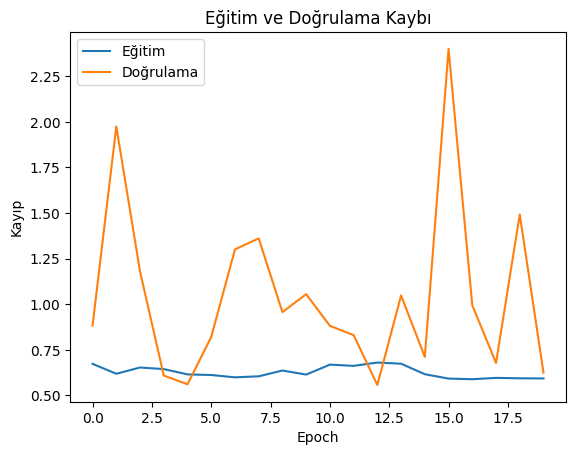

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(['Eğitim', 'Doğrulama'])
plt.show()

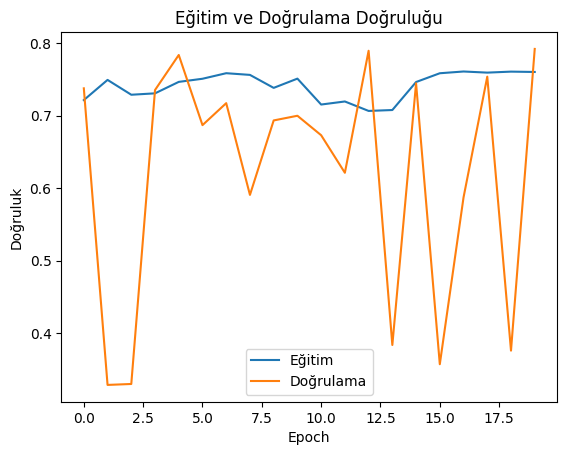

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend(['Eğitim', 'Doğrulama'])
plt.show()

In [131]:
model.fit(x, y, epochs=10, batch_size=32)

Epoch 1/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.7555 - loss: 0.6111
Epoch 2/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7282 - loss: 0.6570
Epoch 3/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7146 - loss: 0.6739
Epoch 4/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7089 - loss: 0.6787
Epoch 5/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7207 - loss: 0.6693
Epoch 6/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7549 - loss: 0.6096
Epoch 7/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7277 - loss: 0.6511
Epoch 8/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7126 - loss: 0.6755
Epoch 9/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7168 - loss: 0.6691
Epoch 10/10
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7186 - loss: 0.6618


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [72]:
xt=test.drop("id", axis=1)

In [141]:
tahmin=model.predict(xt)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [142]:
target=[labels[np.argmax(row)] for row in tahmin]
test["Target"]=target
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,8,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,6,6,6,13.500000,0,11.1,0.6,2.02,Graduate
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,6,11,5,11.000000,0,15.5,2.8,-4.06,Graduate
3,76521,1,44,1,9147,1,39,130.0,1,1,...,3,8,14,5,11.000000,0,8.9,1.4,3.51,Enrolled
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,6,9,4,10.666667,2,7.6,2.6,0.32,Enrolled


In [143]:
test[["id", "Target"]].to_csv("submission.csv", index=False)

In [88]:
gb=GradientBoostingClassifier()
mdl=gb.fit(x,y)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
tahmin2=mdl.predict(xt)

In [90]:
tahmin2

array([0, 2, 2, ..., 0, 0, 0])

In [92]:
test["Target"]=[labels[row] for row in tahmin2]
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,8,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,6,6,6,13.500000,0,11.1,0.6,2.02,Graduate
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,6,11,5,11.000000,0,15.5,2.8,-4.06,Graduate
3,76521,1,44,1,9147,1,39,130.0,1,1,...,3,8,14,5,11.000000,0,8.9,1.4,3.51,Enrolled
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,6,9,4,10.666667,2,7.6,2.6,0.32,Enrolled


In [93]:
test[["id", "Target"]].to_csv("submission.csv", index=False)

## Sonuç:
Derin öğrenme modeli ile Kaggle Score: 0.80239 iken makine öğrenmesi ile 0.82856 elde edilmiştir.